<a href="https://colab.research.google.com/github/marianaufcg/Capacitacao/blob/main/modos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

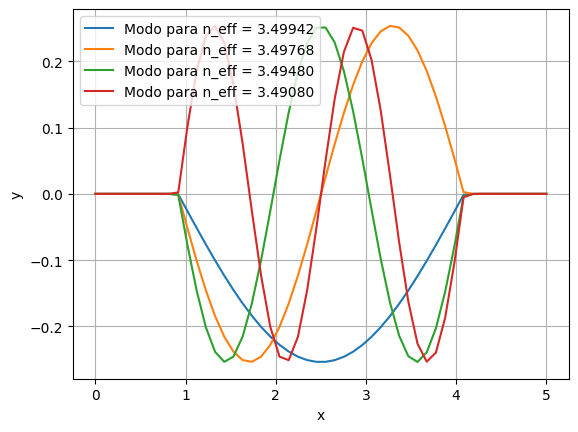

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as sp

# Variáveis do guia de onda ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

n1 = 1     # índice de refração da primeira camada
n2 = 3.5   # índice de refração da camda do meio
n3 = 2.44  # índice de refração última camada

d1 = 1     # espessura da primeira camada
d2 = 3     # espessura da camada do meio
d3 = 1     # espessura da última camada

r = 0.1      # resolução

h = 0.01   # espaçamento do método numérico

lambda_onda = 15 * (10**(-3)) # comprimento de onda em metros

k0 = (2*np.pi)/lambda_onda    # Número de onda

# Matriz da Transformação Linear ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

# Matriz diagonal de índices de refração

lista = round(d1/r)*[n1] + round(d2/r)*[n2] + round(d3/r)*[n3]

matriz_n2 = sp.diags(
    diagonals=[lista],
    offsets=[0],
    format="csr")

# Matriz operador Dx~^2

diag_principal = len(lista)*[-2]
diag_adj = (len(lista)-1)*[1]

matriz_Dx2 = sp.diags(
    diagonals=[diag_principal, diag_adj, diag_adj],
    offsets=[0, -1, 1],
    format="csr")

matriz_Dx2 = matriz_Dx2 / ((k0**2)*(h**2))

matriz_transformacao = matriz_n2.toarray() + matriz_Dx2.toarray()

# Autovalores e Autovetores ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

autovalores, autovetores = np.linalg.eig(matriz_transformacao)

# Plotagem ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

x = np.linspace(0, d1+d2+d3, len(lista))

n_plots = 4       # Número de modos plotados
contador = 0      # Variável auxiliar

for i in range (0, autovetores.shape[1]):

  if autovalores[i] >= 1:
    plt.plot(x, autovetores[:,i], label = "Modo para n_eff = %.5f" %(autovalores[i]))
    contador += 1

    if contador == n_plots :
      break

plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

